In [1]:
import pickle

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matrixprofile import matrixProfile, motifs
import random
import seaborn as sns

In [3]:
with open ("network_lig_cel.pkl", "rb") as model:
    network = pickle.load(model)

In [4]:
network

In [5]:
D3011_data = np.load('dataset_TipLig_CL.npz')
force_data = D3011_data['vDeflection_N'] * 10**9
random.seed(1025)
random.shuffle(force_data)
train_data = force_data[:100]

In [6]:
size = len(train_data[0]) # x data points
sample_size = len(train_data) # rows
print(size, sample_size)

800 100


In [7]:
joined_data = train_data[0]
for i in range(1, len(train_data)):
    joined_data = np.concatenate((joined_data, train_data[i]))
len(joined_data)

80000

In [8]:
mp = matrixProfile.stomp(joined_data, size)

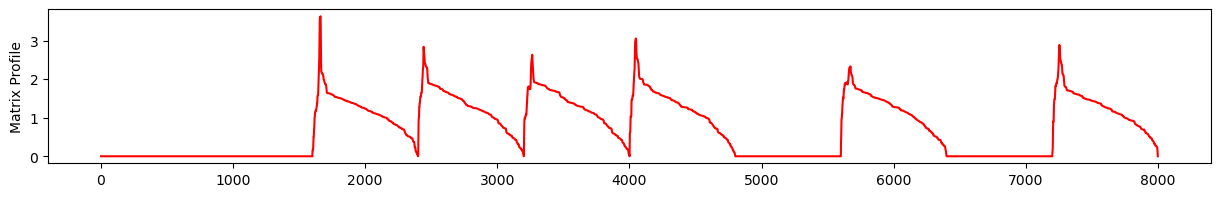

In [9]:
plt.figure(figsize=(15,2))
plt.plot(np.arange(8000), mp[0][:8000], color='red')
plt.ylabel("Matrix Profile")
plt.show()

In [10]:
mtfs, motif_d  = motifs.motifs(joined_data, mp, max_motifs=1000)

In [11]:
motif_center_list = []
for motif in mtfs:
    center_pointers = list(np.arange(motif[0], motif[0]+size)) # Indexes of the central subsequence 
    # each center point start at the starting point of the significant motif (a time serie) and finish at the end of the serie
    motif_center_ts = joined_data[center_pointers] # use the indexes to extract the correspondent sequence in joined_data
    motif_center_list.append(motif_center_ts)

In [12]:
def recupera_ts(joined_ts_data, unit, network, mtfs, size, force_data):
    
    id_motifs = network.capture_objects #indices dos motifs em cada unidade
    curvas = []
    motifs = []
    p_mins = []
    
    for i in id_motifs[unit]: #pega o cluster de interesse
        motif = mtfs[i][0] #recupera o indice dos motifs do cluster de interesse
        motifs.append(motif)
    for motif in motifs: #analise o ponto de mínimo de cada motif
        p_min = min(joined_ts_data[motif:motif+size])
        p_mins.append(p_min)
        p_min_index = list(joined_ts_data[motif:motif+size]).index(p_min)
            
        if p_min_index < 100:
            idx_curva = motif // size 
            curvas.append(force_data[idx_curva])
                
        elif p_min_index >= 100 and p_min_index < 150:
            print(f"Duas curvas possíveis no motif {motif}")
            idx_curva_1 = motif // size 
            idx_curva_2 =motif // size + 1
                
            plt.plot(force_data[idx_curva_1], color="r")
            plt.title(f"Série temporal {idx_curva_1} do conjunto de dados")
            plt.xlabel('X data points',fontsize=12)
            plt.ylabel('Force (nN)',fontsize=12)
            plt.show()
                
            plt.plot(force_data[idx_curva_2], color="r")
            plt.title(f"Série temporal {idx_curva_2} do conjunto de dados")
            plt.xlabel('X data points',fontsize=12)
            plt.ylabel('Force (nN)',fontsize=12)
            plt.show()

            best_curve = input("Identifique qual curva melhor se encaixa no cluster de interesse. Insira 1 para a CURVA 1, 2 para a CURVA 2, ou 3 para ambas as curvas.")
                
            while best_curve not in [1,2,3]:
                print("Você deve inserir 1 para a CURVA 1, 2 para a CURVA 2 ou 3 para ambas as curvas.")
                best_curve = int(input("Identifique qual curva melhor se encaixa no cluster de interesse."))
                          
            if best_curve == 1:
                curvas.append([force_data[idx_curva_1]])
            elif best_curve == 2:
                curvas.append([force_data[idx_curva_2]])
            else:
                curvas.append([force_data[idx_curva_1],force_data[idx_curva_2]])
           
        else:
            idx_curva = motif // size + 1 
            curvas.append(force_data[idx_curva])
                
    return curvas, p_mins

### Cluster 0

Duas curvas possíveis no motif 30400


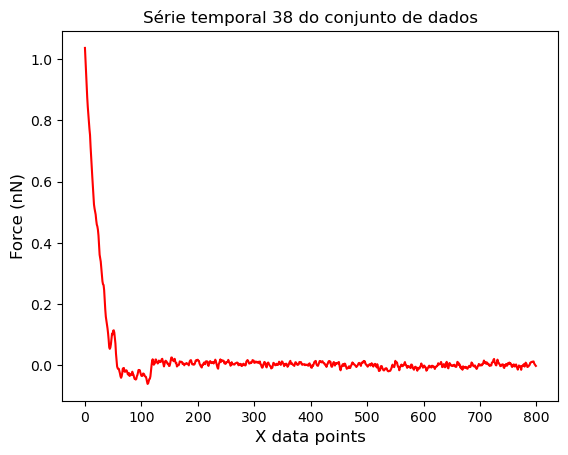

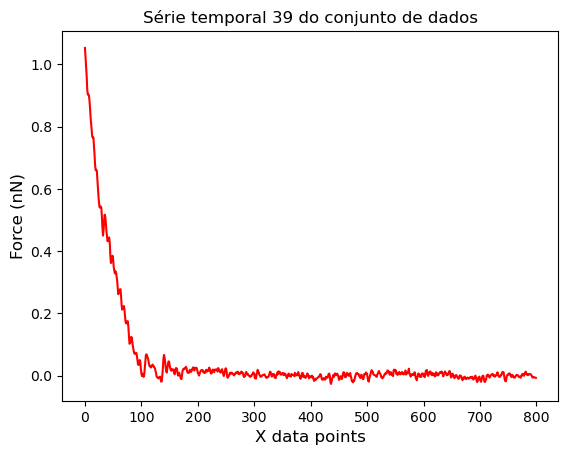

Identifique qual curva melhor se encaixa no cluster de interesse. Insira 1 para a CURVA 1, 2 para a CURVA 2, ou 3 para ambas as curvas. 1


Você deve inserir 1 para a CURVA 1, 2 para a CURVA 2 ou 3 para ambas as curvas.


Identifique qual curva melhor se encaixa no cluster de interesse. 1


Duas curvas possíveis no motif 42400


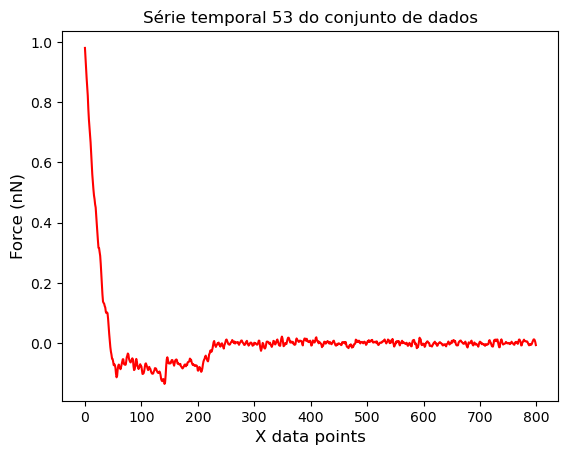

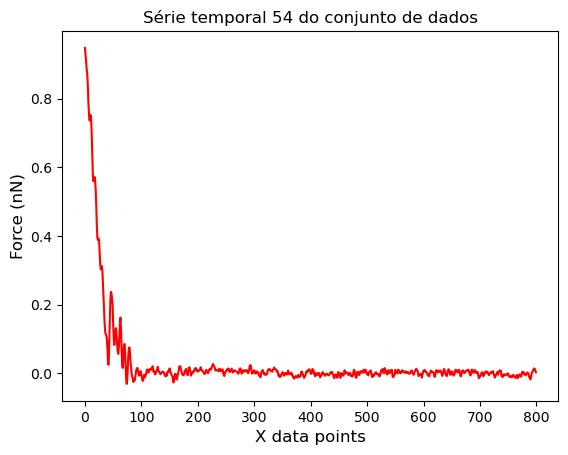

Identifique qual curva melhor se encaixa no cluster de interesse. Insira 1 para a CURVA 1, 2 para a CURVA 2, ou 3 para ambas as curvas. 2


Você deve inserir 1 para a CURVA 1, 2 para a CURVA 2 ou 3 para ambas as curvas.


Identifique qual curva melhor se encaixa no cluster de interesse. 2


In [29]:
curvas_0, p_mins_0 = recupera_ts(joined_data, 0, network, mtfs, size, force_data)

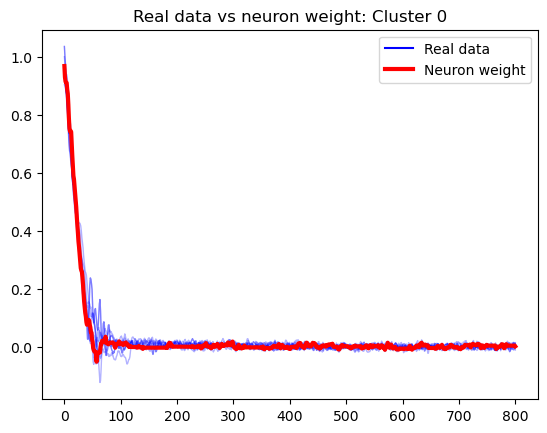

In [36]:
x = np.linspace(0, 800, 800)  # Eixo X

ys_secundarias0 = curvas_0

y_principal0 = network.weights[0]

for y0 in ys_secundarias0:
    y0 = np.reshape(y0, (800,))
    plt.plot(list(x), list(y0), color='blue', linewidth=1, linestyle='-', alpha=0.3)

plt.plot([], [], color="blue", label="Real data")

plt.plot(x, y_principal0, color='red', linewidth=3, label='Neuron weight')
plt.legend()
plt.title("Real data vs neuron weight: Cluster 0")

# Exibir o gráfico
plt.show()

In [33]:
p_mins_0 = list(map(lambda x: -x, p_mins_0))

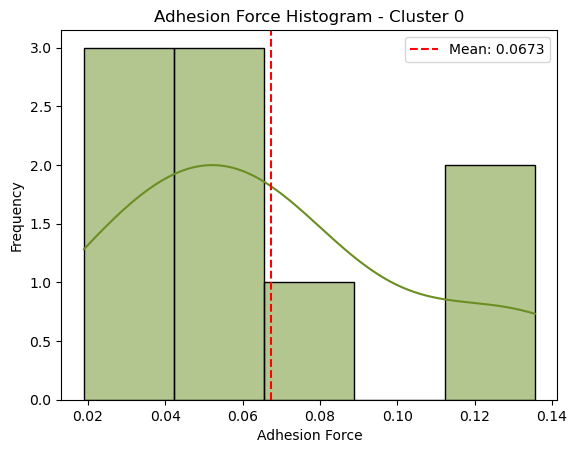

In [34]:
eixo = sns.histplot(p_mins_0, kde=True, stat="count", color='olivedrab')

mean_0 = np.mean(p_mins_0)

plt.axvline(mean, color='r', linestyle='dashed', label=f'Mean: {round(mean, 4)}')

plt.legend()
plt.title("Adhesion Force Histogram - Cluster 0")
plt.xlabel("Adhesion Force")
plt.ylabel("Frequency")
plt.show()

### Cluster 1

In [35]:
curvas_1, p_mins_1 = recupera_ts(joined_data, 1, network, mtfs, size, force_data)

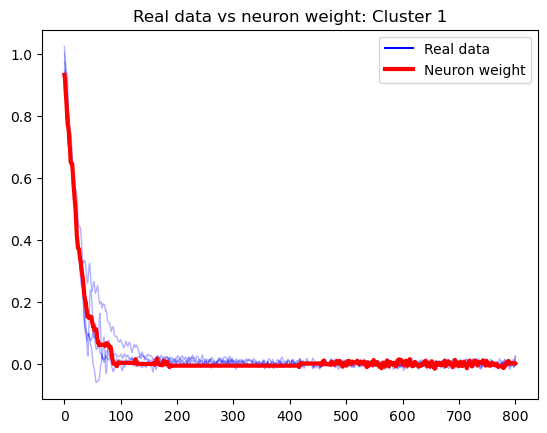

In [38]:
x = np.linspace(0, 800, 800)  # Eixo X

ys_secundarias1 = curvas_1

y_principal1 = network.weights[1]

for y1 in ys_secundarias1:
    y1 = np.reshape(y1, (800,))
    plt.plot(list(x), list(y1), color='blue', linewidth=1, linestyle='-', alpha=0.3)

plt.plot([], [], color="blue", label="Real data")

plt.plot(x, y_principal1, color='red', linewidth=3, label='Neuron weight')
plt.legend()
plt.title("Real data vs neuron weight: Cluster 1")

# Exibir o gráfico
plt.show()

In [42]:
p_mins_1 = list(map(lambda x: -x, p_mins_1))

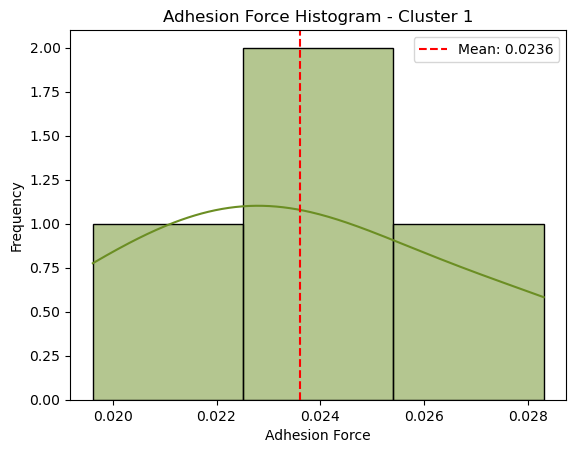

In [43]:
eixo = sns.histplot(p_mins_1, kde=True, stat="count", color='olivedrab')

mean_1 = np.mean(p_mins_1)

plt.axvline(mean_1, color='r', linestyle='dashed', label=f'Mean: {round(mean_1, 4)}')

plt.legend()
plt.title("Adhesion Force Histogram - Cluster 1")
plt.xlabel("Adhesion Force")
plt.ylabel("Frequency")
plt.show()

### Cluster 2

Duas curvas possíveis no motif 0


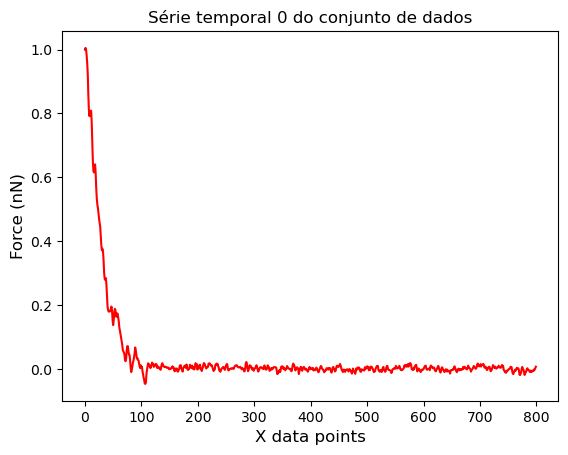

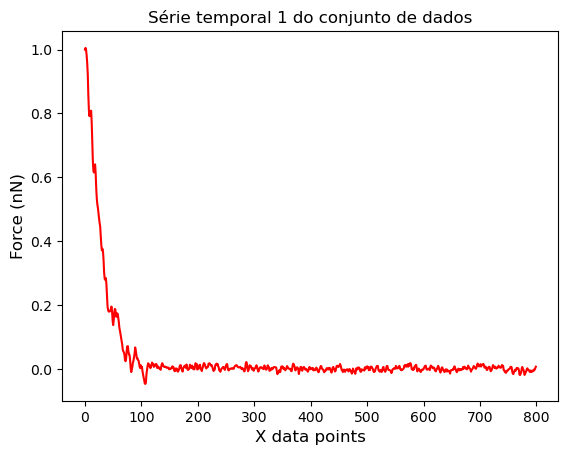

Identifique qual curva melhor se encaixa no cluster de interesse. Insira 1 para a CURVA 1, 2 para a CURVA 2, ou 3 para ambas as curvas. 0


Você deve inserir 1 para a CURVA 1, 2 para a CURVA 2 ou 3 para ambas as curvas.


Identifique qual curva melhor se encaixa no cluster de interesse. 0


Você deve inserir 1 para a CURVA 1, 2 para a CURVA 2 ou 3 para ambas as curvas.


Identifique qual curva melhor se encaixa no cluster de interesse. 1


Duas curvas possíveis no motif 48800


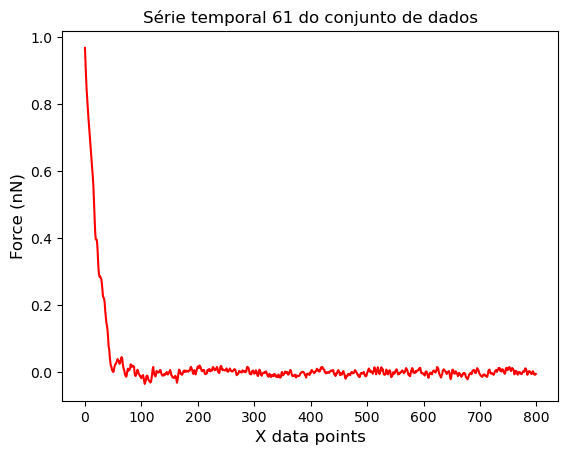

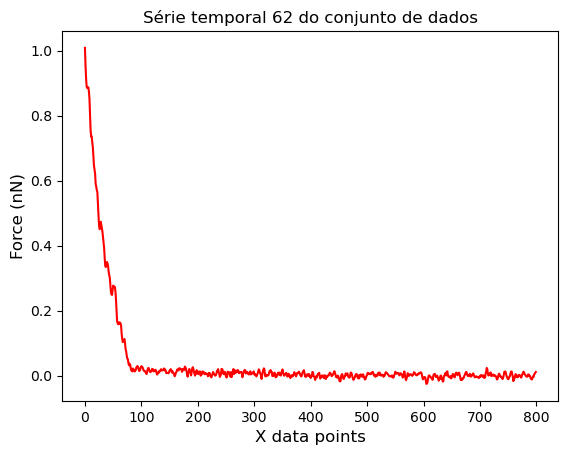

Identifique qual curva melhor se encaixa no cluster de interesse. Insira 1 para a CURVA 1, 2 para a CURVA 2, ou 3 para ambas as curvas. 2


Você deve inserir 1 para a CURVA 1, 2 para a CURVA 2 ou 3 para ambas as curvas.


Identifique qual curva melhor se encaixa no cluster de interesse. 2


In [45]:
curvas_2, p_mins_2 = recupera_ts(joined_data, 2, network, mtfs, size, force_data)

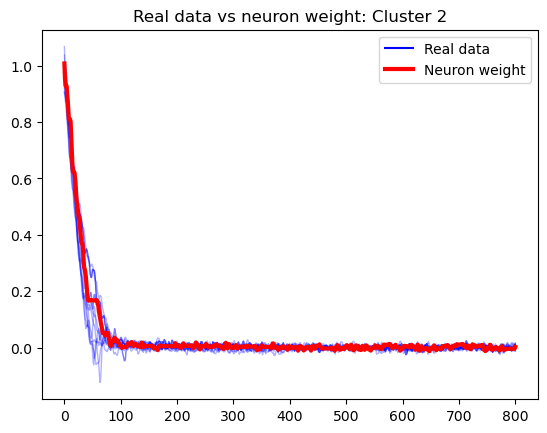

In [46]:
x = np.linspace(0, 800, 800)  # Eixo X

ys_secundarias2 = curvas_2

y_principal1 = network.weights[2]

for y2 in ys_secundarias2:
    y2 = np.reshape(y2, (800,))
    plt.plot(list(x), list(y2), color='blue', linewidth=1, linestyle='-', alpha=0.3)

plt.plot([], [], color="blue", label="Real data")

plt.plot(x, y_principal1, color='red', linewidth=3, label='Neuron weight')
plt.legend()
plt.title("Real data vs neuron weight: Cluster 2")

# Exibir o gráfico
plt.show()

In [47]:
p_mins_2 = list(map(lambda x: -x, p_mins_2))

In [ ]:
eixo = sns.histplot(p_mins_2, kde=True, stat="count", color='olivedrab')

mean_2 = np.mean(p_mins_2)

plt.axvline(mean_2, color='r', linestyle='dashed', label=f'Mean: {round(mean_1, 4)}')

plt.legend()
plt.title("Adhesion Force Histogram - Cluster 1")
plt.xlabel("Adhesion Force")
plt.ylabel("Frequency")
plt.show()